In [1]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wrangle Synthetic Medical Record Data
#
##########################################################################################

## Fetch data
Go here: https://drive.google.com/drive/folders/0B5Wu8z15TIbiLUhvcWxaMDJCRGs

Get this data set: 10000-Patients.zip

unzip it into the Data folder

In [2]:
import pandas as pd
import pylab as plt
import numpy as np
import datetime as dt

In [3]:
##################################################################################################################
#
# YouDo: Import each of the 4 files into its own data frame
#         (Hint:  they're tab-separated)

In [4]:
# 1) 
admiss_core = pd.read_csv("../Data/10000-Patients/AdmissionsCorePopulatedTable.txt",sep="\t",index_col="PatientID")
admiss_diag_core = pd.read_csv("../Data/10000-Patients/AdmissionsDiagnosesCorePopulatedTable.txt",sep="\t",index_col="PatientID")
patient_core = pd.read_csv("../Data/10000-Patients/PatientCorePopulatedTable.txt",sep="\t",index_col="PatientID")
labs_core = pd.read_csv("../Data/10000-Patients/LabsCorePopulatedTable.txt",sep="\t",index_col="PatientID")

In [5]:
##################################################################################################################
#
# YouDo: Notice that there are many columns with dates, but pandas assumed they're strings
#
#        1) use the pd.to_datetime() method to transform all of the time columns to have type datetime
#            # stretch goal:  do it in a loop based on the string 'Date' appearing in the column name
#
# Show the type
def convert_cols_to_datetime(df):
    num = 0
    for col in df:
        if "date" in col.lower() and type(df[col]) is not np.dtype('datetime64[ns]'):
            num += 1
            df[col] = pd.to_datetime(df[col])
    print("Converted %d columns to dates." % num)
    print(df.dtypes)
    print("\n")

In [1]:
# 1) 
convert_cols_to_datetime(admiss_core)
convert_cols_to_datetime(admiss_diag_core)
convert_cols_to_datetime(patient_core)
convert_cols_to_datetime(labs_core)

## Instructor comment
## Solved like a true computer scientist.

NameError: name 'convert_cols_to_datetime' is not defined

In [7]:
# As is typical in complex data sets, informtion about each patient is broken up into several different
# tables, cross-referenced by a patient id
##################################################################################################################
#
# YouDo: Print out the records from each of the four tables for patient number
# '327A3C2F-B234-400B-B994-833073C014C0'



In [8]:
admiss_core.loc['327A3C2F-B234-400B-B994-833073C014C0']

## Instructor comment
## Setting the data frame index PatientID is a nice solution to this problem, however
## having a non-unique index could problems if you're using someone else's code

,AdmissionID,AdmissionStartDate,AdmissionEndDate
PatientID,,,
327A3C2F-B234-400B-B994-833073C014C0,1,1985-05-02 03:28:04.047,1985-05-07 02:33:18.970
327A3C2F-B234-400B-B994-833073C014C0,2,1993-01-26 22:14:39.247,1993-02-01 22:25:06.137
327A3C2F-B234-400B-B994-833073C014C0,3,1998-10-26 15:55:32.827,1998-11-03 02:48:41.307
327A3C2F-B234-400B-B994-833073C014C0,4,2005-11-03 07:41:26.787,2005-11-11 08:24:10.020
327A3C2F-B234-400B-B994-833073C014C0,5,2011-11-17 20:08:57.343,2011-12-04 19:19:03.410


In [9]:
admiss_diag_core.loc['327A3C2F-B234-400B-B994-833073C014C0']

,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
PatientID,,,
327A3C2F-B234-400B-B994-833073C014C0,1,Z13.88,Encounter for screening for disorder due to ex...
327A3C2F-B234-400B-B994-833073C014C0,2,M06.272,"Rheumatoid bursitis, left ankle and foot"
327A3C2F-B234-400B-B994-833073C014C0,3,G54.4,"Lumbosacral root disorders, not elsewhere clas..."
327A3C2F-B234-400B-B994-833073C014C0,4,C72.0,Malignant neoplasm of spinal cord
327A3C2F-B234-400B-B994-833073C014C0,5,I24.0,Acute coronary thrombosis not resulting in myo...


In [10]:
patient_core.loc['327A3C2F-B234-400B-B994-833073C014C0']

PatientGender                                                  Female
PatientDateOfBirth                         1962-06-14 05:01:30.953000
PatientRace                                                     Asian
PatientMaritalStatus                                           Single
PatientLanguage                                               English
PatientPopulationPercentageBelowPoverty                         18.96
Name: 327A3C2F-B234-400B-B994-833073C014C0, dtype: object

In [11]:
labs_core.loc['327A3C2F-B234-400B-B994-833073C014C0']

,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,
327A3C2F-B234-400B-B994-833073C014C0,1,URINALYSIS: WHITE BLOOD CELLS,1.8,wbc/hpf,1985-05-02 09:12:26.550
327A3C2F-B234-400B-B994-833073C014C0,1,CBC: RED BLOOD CELL COUNT,4.8,m/cumm,1985-05-02 18:05:24.573
327A3C2F-B234-400B-B994-833073C014C0,1,CBC: HEMATOCRIT,30.7,%,1985-05-02 09:48:19.407
327A3C2F-B234-400B-B994-833073C014C0,1,URINALYSIS: SPECIFIC GRAVITY,1.0,no unit,1985-05-02 14:57:08.487
327A3C2F-B234-400B-B994-833073C014C0,1,CBC: MEAN CORPUSCULAR VOLUME,75.8,fl,1985-05-02 15:37:22.123
327A3C2F-B234-400B-B994-833073C014C0,1,METABOLIC: ALT/SGPT,61.3,U/L,1985-05-02 14:26:57.563
327A3C2F-B234-400B-B994-833073C014C0,1,CBC: ABSOLUTE NEUTROPHILS,71.1,%,1985-05-02 14:40:09.590
327A3C2F-B234-400B-B994-833073C014C0,1,CBC: LYMPHOCYTES,4.5,k/cumm,1985-05-02 19:58:42.387
327A3C2F-B234-400B-B994-833073C014C0,1,METABOLIC: ALBUMIN,5.4,gm/dL,1985-05-02 11:11:52.860


In [12]:
# Holy cow!  this patient has 1203 lab results in her record
# This is synthetic data, so it's bound to have weird things.  Is that normal in this data?
##################################################################################################################
#
# You do:
#   1) Compute the average & standard deviation of number of labs per patient.
#         hint:  Consider pd.groupby()
#
#   2) Compute a list of each lab and how many orders for that lab are in the data frame
#         

In [23]:
#1)  
avg_std = labs_core.groupby(level=0).agg({"LabName":{"NumUnique" : lambda x : len(x.unique()),"NumTotal" : "count"}})
avg_std.agg(["mean","std"])

LabName             
      NumUnique     NumTotal
mean  34.997700  1072.650500
std    0.055633   522.680135

In [24]:
# 2)
num_orders = labs_core.groupby("LabName").agg({"LabName":"count"}).rename(columns={"LabName":"NumOfOrders"})
num_orders

,NumOfOrders
LabName,
CBC: ABSOLUTE LYMPHOCYTES,306883
CBC: ABSOLUTE NEUTROPHILS,306215
CBC: BASOPHILS,305953
CBC: EOSINOPHILS,306886
CBC: HEMATOCRIT,306557
CBC: HEMOGLOBIN,306150
CBC: LYMPHOCYTES,306957
CBC: MCH,306592
CBC: MCHC,305947


In [25]:
# It seems that this data set has the same patient getting the same labs perhaps dozens of times.
# Lets make a visualization of one of the time vs. one of the lab values for a specific patient.
##################################################################################################################
#
# You do:
#   1) Find the patient/lab combination with the most labs taken
#   2) For the most-measured patient/lab combination, make a time vs lab-value plot

In [26]:
tmp = labs_core.groupby(["PatientID","LabName"]).agg({"AdmissionID":"count"}).rename(columns={"AdmissionID":"Visits"})

In [27]:
tmp.idxmax()

Visits    (3D33CC75-3EF0-49B5-9524-B4E8A7C08F25, METABOL...
dtype: object

In [28]:
# 1) 
biggest_value = tmp.max().Visits
biggest_loc = tmp.idxmax()
print("Largest combination: \n")
print(biggest_loc)
print("Largest value: %d" % biggest_value)
assert biggest_value == 117

Largest combination: 

Visits    (3D33CC75-3EF0-49B5-9524-B4E8A7C08F25, METABOL...
dtype: object
Largest value: 117


In [29]:
# 2) 
msrs = labs_core.set_index("LabName",append=True).loc[biggest_loc]

In [30]:
msrs

AdmissionID  \
PatientID                            LabName                              
3D33CC75-3EF0-49B5-9524-B4E8A7C08F25 METABOLIC: BILI TOTAL            1   
                                     METABOLIC: BILI TOTAL            1   
                                     METABOLIC: BILI TOTAL            1   
                                     METABOLIC: BILI TOTAL            1   
                                     METABOLIC: BILI TOTAL            1   
                                     METABOLIC: BILI TOTAL            1   
                                     METABOLIC: BILI TOTAL            1   
                                     METABOLIC: BILI TOTAL            1   
                                     METABOLIC: BILI TOTAL            1   
                                     METABOLIC: BILI TOTAL            1   
                                     METABOLIC: BILI TOTAL            1   
                                     METABOLIC: BILI TOTAL            1   
                                     METABOLIC: BILI TOTAL            1   
                                     METABOLIC: BILI TOTAL            2   
                                     METABOLIC: BILI TOTAL            2   
                                     METABOLIC: BILI TOTAL            2   
                                     METABOLIC: BILI TOTAL            2   
                                     METABOLIC: BILI TOTAL            2   
                                     METABOLIC: BILI TOTAL            2   
                                     METABOLIC: BILI TOTAL            2   
                                     METABOLIC: BILI TOTAL            2   
                                     METABOLIC: BILI TOTAL            2   
                                     METABOLIC: BILI TOTAL            2   
                                     METABOLIC: BILI TOTAL            2   
                                     METABOLIC: BILI TOTAL            2   
                                     METABOLIC: BILI TOTAL            2   
                                     METABOLIC: BILI TOTAL            3   
                                     METABOLIC: BILI TOTAL            3   
                                     METABOLIC: BILI TOTAL            3   
                                     METABOLIC: BILI TOTAL            3   
...                                                                 ...   
                                     METABOLIC: BILI TOTAL            7   
                                     METABOLIC: BILI TOTAL            7   
                                     METABOLIC: BILI TOTAL            7   
                                     METABOLIC: BILI TOTAL            7   
                                     METABOLIC: BILI TOTAL            7   
                                     METABOLIC: BILI TOTAL            8   
                                     METABOLIC: BILI TOTAL            8   
                                     METABOLIC: BILI TOTAL            8   
                                     METABOLIC: BILI TOTAL            8   
                                     METABOLIC: BILI TOTAL            8   
                                     METABOLIC: BILI TOTAL            8   
                                     METABOLIC: BILI TOTAL            8   
                                     METABOLIC: BILI TOTAL            8   
                                     METABOLIC: BILI TOTAL            8   
                                     METABOLIC: BILI TOTAL            8   
                                     METABOLIC: BILI TOTAL            8   
                                     METABOLIC: BILI TOTAL            8   
                                     METABOLIC: BILI TOTAL            8   
                                     METABOLIC: BILI TOTAL            8   
                                     METABOLIC: BILI TOTAL            8   
                                     METABOLIC: BILI TOTAL            9   
          

Text(0, 0.5, 'LabValue')

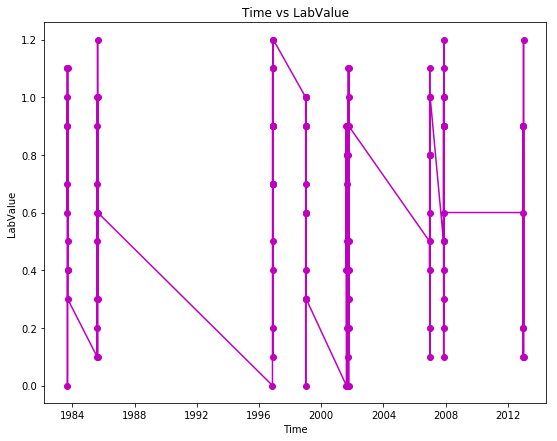

In [31]:
plt.figure(figsize=(9,7))
plt.title("Time vs LabValue")
plt.plot(msrs.LabDateTime,msrs.LabValue,"-mo")
plt.xlabel("Time")
plt.ylabel("LabValue")

In [32]:
##################################################################################################################
#
# You do:
#   Closely inspect the plot you made.  
#
# 1) In order to compare this to another data set, your PI wants to know what the lab value was on August 6, 1985.  
#    What would you tell him/her (including all caveats)?
#
# 2) How about the value for January 19, 1992?

In [33]:
# 1) 
msrs.reset_index(drop=True).set_index("LabDateTime").loc["1985/08/01":"1985/08/31"]
# Based on this, I would give the value as 0.5 mg/dL, but I would note that this measurement was 
# taken very late in the day, compared to most of the other measurments.

,AdmissionID,LabValue,LabUnits
LabDateTime,,,
1985-08-02 02:11:40.450,2,0.1,mg/dL
1985-08-03 07:37:13.917,2,0.7,mg/dL
1985-08-05 03:47:57.450,2,0.2,mg/dL
1985-08-06 22:05:51.507,2,0.5,mg/dL
1985-08-08 08:41:41.363,2,0.9,mg/dL
1985-08-09 23:22:19.253,2,0.3,mg/dL
1985-08-10 21:39:11.717,2,1.0,mg/dL
1985-08-11 22:09:08.573,2,0.6,mg/dL
1985-08-13 19:05:17.017,2,0.1,mg/dL


In [34]:
# 2)
msrs.reset_index(drop=True).set_index("LabDateTime").loc["1992/01/19"]
# This value does not exist. There is a large chunk of missing data between 1985 and 1997 

## Instructor comment:
## Good.  You might think of it as being undersampled making interpolations dodgy at best.

,AdmissionID,LabValue,LabUnits
LabDateTime,,,
